# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [26]:
# import libraries here
import pandas as pd
import pylab as plt

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [3]:
# your answer here
temp=pd.read_csv('Temp_States.csv')


#### Print `temp`

In [4]:
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [6]:
# your answer here
temp.dtypes


City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [9]:
# your answer here
temp[temp.State=='New York']

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [10]:
# your answer here
temp.Temperature.mean()


15.15873015873016

#### We want to know cities and states with Temperature above 15 degress Celcius

In [11]:
# your answer here
temp[temp.Temperature>15]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [12]:
# your answer here
temp.City[temp.Temperature>15]

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [15]:
# your answer here
temp.City[(temp.Temperature>15) & (temp.Temperature<20) ]

0         NYC
3    Hartford
Name: City, dtype: object

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [16]:
# your answer here
temp.groupby('State').mean()


,Temperature
State,
Connecticut,15.833333
New Jersey,21.111111
New York,10.740741


In [17]:
temp.groupby('State').std()

,Temperature
State,
Connecticut,1.964186
New Jersey,1.571348
New York,8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [18]:
# your answer here
employee=pd.read_csv('employee.csv')

#### Explore the data types of the Temp dataframe. Comment your results

In [19]:
# your answer here
employee.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

(array([4., 0., 0., 0., 0., 3., 0., 0., 0., 2.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

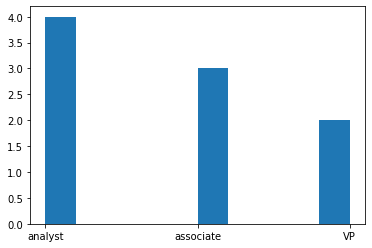

In [77]:
# your answer here


plt.hist(employee['Title'])



#### What's the average salary in this company?

In [35]:
# your answer here
employee.Salary.mean()

48.888888888888886

#### What's the highest salary?

In [36]:
# your answer here
employee.Salary.max()

70

#### What's the lowest salary?

In [37]:
# your answer here
employee.Salary.min()

30

#### Who are the employees with the lowest salary?

In [55]:
# your answer here
employee.Name[employee.Salary==employee.Salary.min()]

1    Maria
2    David
Name: Name, dtype: object

#### Could you give all the information about an employee called David?

In [56]:
# your answer here
employee[employee.Name=='David']


,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [58]:
# your answer here
employee.Salary[employee.Name=='David']

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [59]:
# your answer here
employee[employee.Title=='associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [61]:
# your answer here- 1 method
employee.iloc[:3]


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [63]:
# your answer here- 2nd method
employee.loc[:2]


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [64]:
# your answer here
employee[(employee.Title=='associate') & (employee.Salary>55)]


,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [65]:
# your answer here
employee.groupby('Years').mean()

,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [67]:
# your answer here
employee.groupby('Title').mean()['Salary']

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

{'whiskers': [<matplotlib.lines.Line2D at 0x1ad5227ca60>,
 'caps': [<matplotlib.lines.Line2D at 0x1ad52281070>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ad5227c7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ad52281610>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ad522818e0>],
 'means': []}

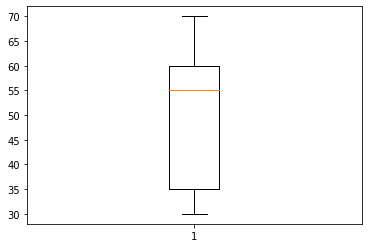

In [69]:
# draw boxplot here
plt.boxplot(employee['Salary'])

In [70]:
# print first quartile here
employee.Salary.quantile(0.25)

35.0

In [71]:
# print third quartile here
employee.Salary.quantile(0.75)

60.0

#### Is the mean salary per gender different?

In [74]:
# your answer here
employee.groupby('Gender').mean()['Salary']

Gender
F    47.5
M    50.0
Name: Salary, dtype: float64

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [76]:
# your answer here
employee.describe()

,Years,Salary
count,9.000000,9.000000
mean,4.111111,48.888889
std,2.803767,16.541194
min,1.000000,30.000000
25%,2.000000,35.000000
50%,3.000000,55.000000
75%,7.000000,60.000000
max,8.000000,70.000000


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [83]:
# your answer here
employee.groupby('Department').agg([lambda x: max(x)-min(x)]).Salary

C:\Users\Alberto\AppData\Local\Temp\ipykernel_6280\799181006.py:2: FutureWarning: ['Name', 'Education', 'Gender', 'Title'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  employee.groupby('Department').agg([lambda x: max(x)-min(x)]).Salary


,<lambda>
Department,
HR,40
IT,40
Sales,0


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [86]:
# your answer here

orders=pd.read_csv('Orders.zip')

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [87]:
# your answer here
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


In [89]:
# your answer here
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [91]:
# your answer here
orders.UnitPrice.mean()

3.1161744805540756

#### What were the highest and lowest purchase prices? 

In [92]:
# your answer here
orders.UnitPrice.max()

8142.75

In [93]:
# your answer here
orders.UnitPrice.min()

0.0

#### Select all the customers we have in Spain

In [107]:
# your answer here
orders.CustomerID[orders.Country=='Spain'].head()

4250    12557
4251    12557
4252    12557
4253    12557
4254    12557
Name: CustomerID, dtype: int64

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [112]:
# your answer here
len(orders.CustomerID[orders.Country=='Spain'].unique())

30

#### Select all the customers who have bought more than 50 items ?

In [110]:
# your answer here
orders.CustomerID[orders.Quantity>50].unique()[:5]

array([13748, 15291, 14688, 16029, 17511], dtype=int64)

#### Select orders from Spain that are above 50 items

In [118]:
# your answer here
orders.Description[(orders.Country=='Spain') & (orders.Quantity>50)].head()

4250    lunch bag suki  design 
4251    lunch bag pink polkadot
4252    lunch bag  black skull.
4253    lunch bag red retrospot
4254        lunch bag cars blue
Name: Description, dtype: object

#### Select all free orders

In [121]:
# your answer here
orders.Description[orders.UnitPrice==0].head()

6914     round cake tin vintage green
22539    advent calendar gingham sack
25379        regency cakestand 3 tier
29080         paper bunting retrospot
29082          plasters in tin skulls
Name: Description, dtype: object

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [124]:
# your answer here
orders.Description[orders.Description.str.contains('lunch bag')].head()

93         lunch bag red retrospot
172    lunch bag dolly girl design
354    lunch bag dolly girl design
359        lunch bag red retrospot
360     lunch bag spaceboy design 
Name: Description, dtype: object

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [130]:
# your answer here
orders[['year','Description']][(orders.Description.str.contains('lunch bag')) & (orders.year==2011)].head()

,year,Description
26340,2011,lunch bag red retrospot
26341,2011,lunch bag woodland
26512,2011,lunch bag spaceboy design
26513,2011,lunch bag woodland
26860,2011,lunch bag pink polkadot


#### Show the frequency distribution of the amount spent in Spain.

(array([3.97921e+05, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([     0.  ,  16846.96,  33693.92,  50540.88,  67387.84,  84234.8 ,
        101081.76, 117928.72, 134775.68, 151622.64, 168469.6 ]),
 <BarContainer object of 10 artists>)

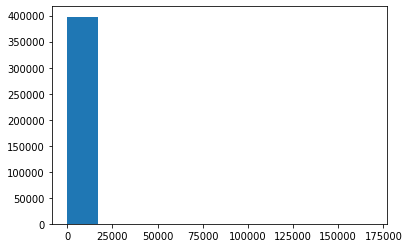

In [135]:
# your answer here
plt.hist(orders.amount_spent)

#### Select all orders made in the month of August

In [140]:
# your answer here
orders[['Description','month']][orders.month==8].head()

,Description,month
199475,6 ribbons elegant christmas,8
199476,scandinavian reds ribbons,8
199477,ivory hanging decoration heart,8
199478,single heart zinc t-light holder,8
199479,hanging heart zinc t-light holder,8


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [143]:
# your answer here
orders['Description'][orders.month==8].count()


27013

#### What's the  average amount of money spent by country

In [146]:
# your answer here
orders.groupby('Country').mean()['amount_spent'].head()

Country
Australia    116.895620
Austria       25.624824
Bahrain       32.258824
Belgium       20.283772
Brazil        35.737500
Name: amount_spent, dtype: float64

#### What's the most expensive item?

In [174]:
# your answer here
orders.Description[orders.Description==orders.Description.max()].unique()[0]

'zinc wire sweetheart letter tray'

#### What was the average amount spent per year ?

In [171]:
# your answer here
orders.groupby('year').sum()['amount_spent']

year
2010     572713.890
2011    8338694.014
Name: amount_spent, dtype: float64

In [172]:
orders.year.value_counts()

2011    371764
2010     26160
Name: year, dtype: int64